# VIDEO
## (A)

Rats learned to avoid poison due to its smell and taste because of the illness it would cause when consumed. This avoidance is bait shyness

## (B)

Pigeons associating coincidental behavior with food, interpreting it as a valid cause and effect.

## (C)

Because rats recognize key features where pigeons ultimately don't care.

## (D)

There is no catch-all learning algorithm that's good for all data. It depends on the data at hand.

# PROBLEM (Regression Trees for Fuel Economy)
## (A)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor
import matplotlib.pyplot as plt
import graphviz
%matplotlib inline

In [2]:
df = pd.read_csv('./Auto-cleaned.csv')
df.head(3)

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite


In [3]:
df = df.drop(df.columns[0],axis=1)
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite


In [4]:
df = pd.get_dummies(df)
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name_amc ambassador brougham,name_amc ambassador dpl,...,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
target = df.mpg
target.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [6]:
features = df.drop('mpg',axis=1)
features.head(3)

,cylinders,displacement,horsepower,weight,acceleration,year,origin,name_amc ambassador brougham,name_amc ambassador dpl,name_amc ambassador sst,...,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
0,8,307.0,130.0,3504,12.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,350.0,165.0,3693,11.5,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,318.0,150.0,3436,11.0,70,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
rtree = DecisionTreeRegressor(max_depth=2)
grid = {'max depth': np.arange(1,26)}

In [8]:
rtree.fit(features, target)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

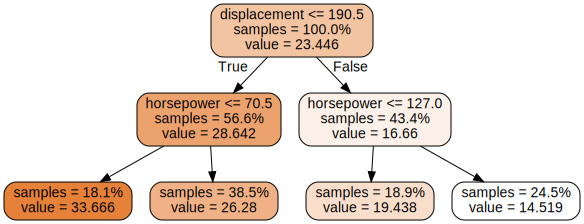

In [10]:
# copied from Bagging Tips Example
dot_data = export_graphviz(rtree,
                          out_file=None,
                          feature_names=features.columns,
                          proportion=True,
                          impurity=False,
                          filled=True,
                          rounded=True,
                          )
graph = graphviz.Source(dot_data)
graph

#### The most important characteristics for describing good fuel economy is displacement, followed by horsepower.

## (B)

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)



best tree depth=  {'max_depth': 97} test accuracy=  0.54


C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


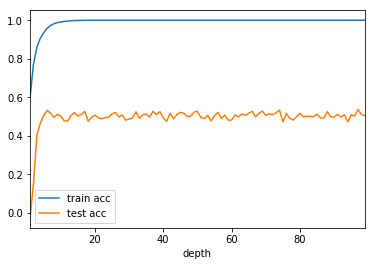

In [15]:
# copied from part b of Regression Trees Wine (lesson 20)
grid = {'max_depth':np.arange(1,100)}

tree = DecisionTreeRegressor()
treeCV = GridSearchCV(rtree,param_grid = grid, return_train_score=True)
treeCV.fit(features,target)

print()
print("best tree depth= ", treeCV.best_params_, "test accuracy= ", treeCV.best_score_.round(2))

performance = pd.DataFrame()
performance['depth'] = grid['max_depth']
performance['train acc'] = treeCV.cv_results_['mean_train_score']
performance['test acc'] = treeCV.cv_results_['mean_test_score']

ax1 = performance.plot.line(x="depth", y="train acc")
performance.plot.line(x='depth',y='test acc',ax=ax1)

#### best tree depth=  {'max_depth': 6} test accuracy=  0.54